In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

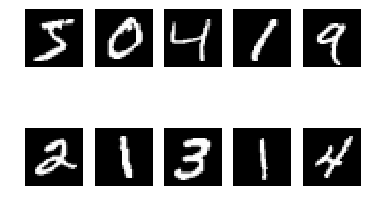

In [5]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i, :, :], cmap='gray')
  plt.axis('off')

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32)
y_train_pre = enc.fit_transform(y_train.reshape(-1, 1))

In [0]:
y_test_pre = enc.fit_transform(y_test.reshape(-1, 1))

In [0]:
X_train_pre = X_train.astype(np.float32) / 255.0
X_train_pre = X_train_pre.reshape((X_train.shape[0], -1))
X_test_pre = X_test.astype(np.float32) / 255.0
X_test_pre = X_test_pre.reshape((X_test.shape[0], -1))


In [0]:
import cv2 as cv
mlp = cv.ml.ANN_MLP_create()

In [0]:
mlp.setLayerSizes(np.array([784, 512, 512, 10]))

In [0]:
mlp.setActivationFunction(cv.ml.ANN_MLP_SIGMOID_SYM, 2.5, 1.0)

In [0]:
mlp.setTrainMethod(cv.ml.ANN_MLP_BACKPROP)
mlp.setBackpropMomentumScale(0.0001)

In [0]:
term_mode = (cv.TERM_CRITERIA_MAX_ITER +
            cv.TERM_CRITERIA_EPS)
term_max_iter = 10
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter, term_eps))

In [14]:
mlp.train(X_train_pre, cv.ml.ROW_SAMPLE, y_train_pre)

True

In [0]:
_, y_hat_train = mlp.predict(X_train_pre)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat_train.round(), y_train_pre)

0.5035833333333334

In [21]:
_, y_hat_test = mlp.predict(X_test_pre)
accuracy_score(y_hat_test.round(), y_test_pre)

0.504